# Video: Plotting Numeric Targets vs One Input Variable

This video shows how to plot the relationship between individual input variables and a numeric target variable.

TODO add box plots in here

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
abalone = pd.read_csv("https://raw.githubusercontent.com/bu-omds/bu-omds-data/main/data/abalone.tsv", sep="\t")

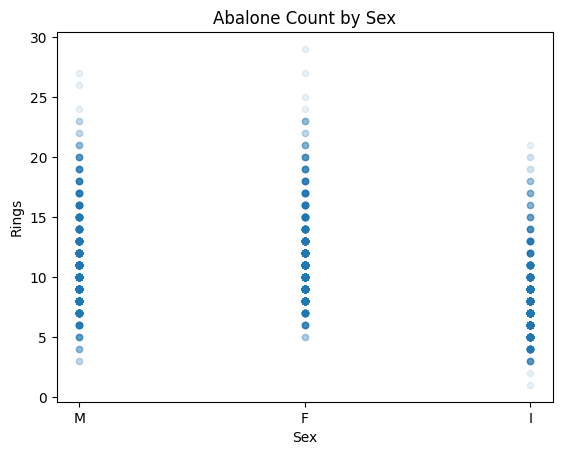

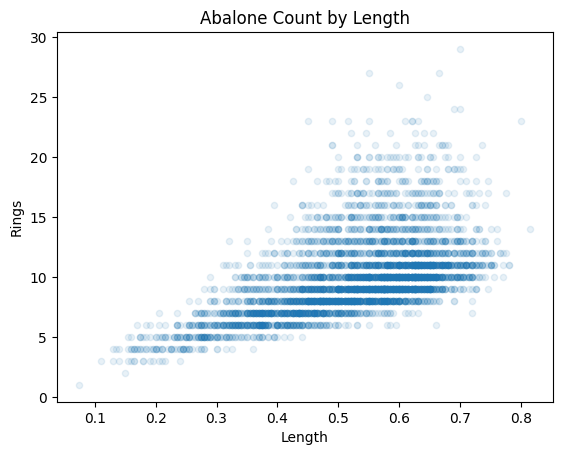

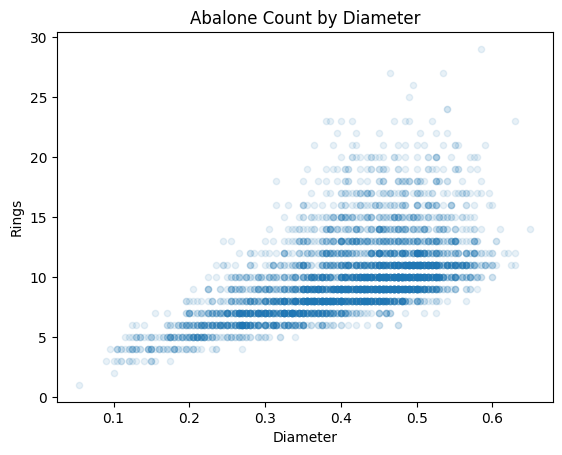

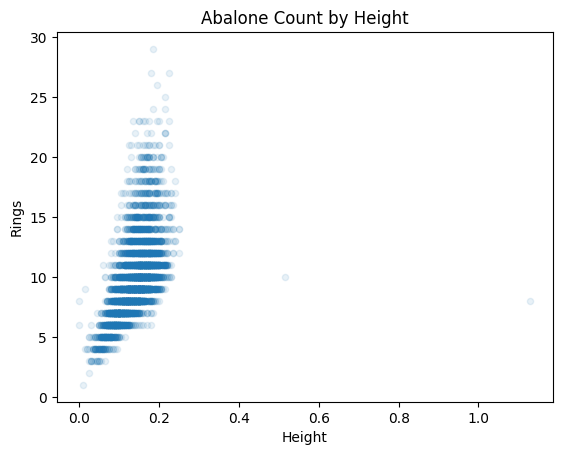

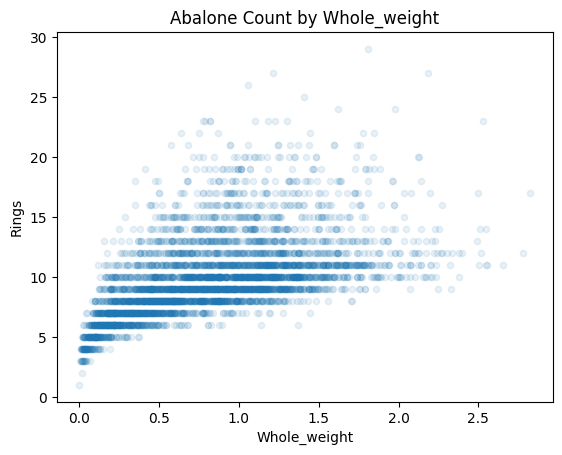

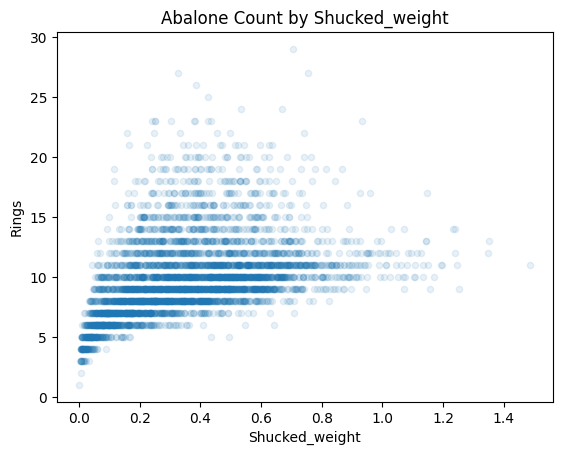

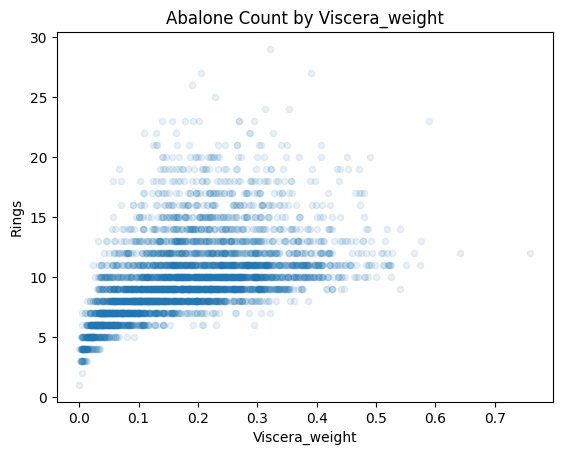

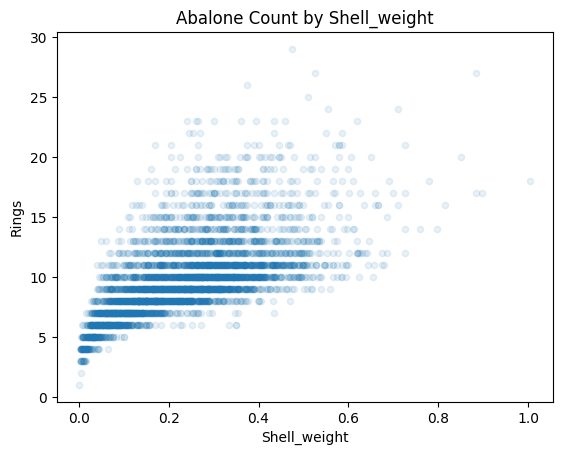

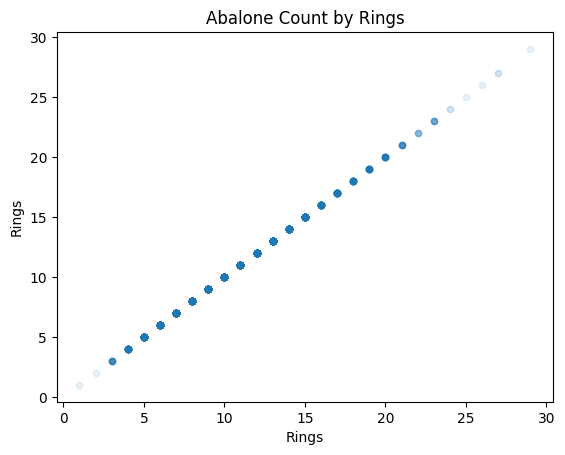

In [ ]:
for c in abalone.columns:
    abalone.plot.scatter(c, "Rings", alpha=0.1)
    plt.xlabel(c)
    plt.ylabel("Rings")
    plt.title(f"Abalone Count by {c}")
    plt.show()

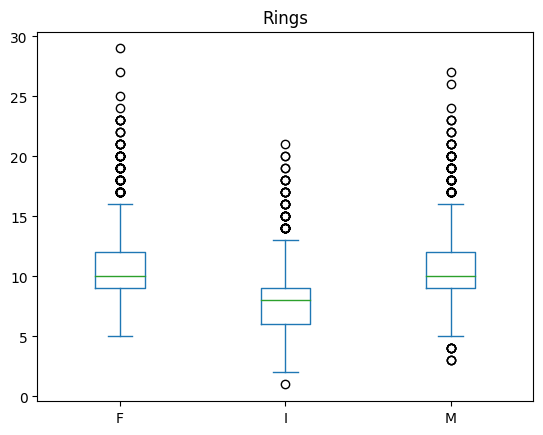

In [ ]:
abalone.plot.box(column="Rings", by="Sex")
None

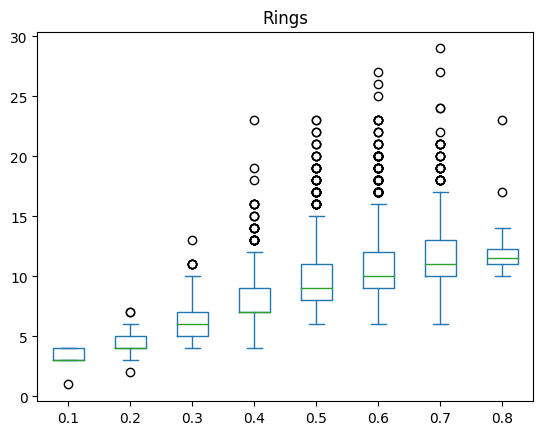

In [ ]:
abalone_rounded = abalone.copy()
abalone_rounded["Length"] = abalone_rounded["Length"].round(1)
abalone_rounded.plot.box(column="Rings", by="Length")
None

<ipython-input-43-310e13ad889e>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_rows, num_cols, i + 1)
<ipython-input-43-310e13ad889e>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_rows, num_cols, i + 1)
<ipython-input-43-310e13ad889e>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_rows, num_cols, i + 1)
<ipython-input-43-310e13ad889e>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_rows, num_cols, i + 1)
<ipython

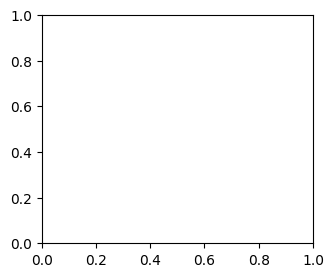

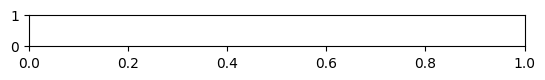

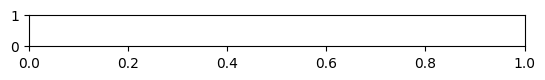

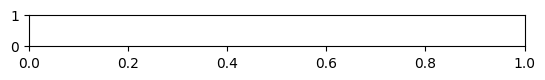

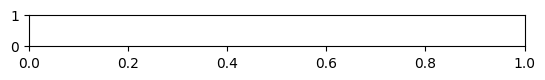

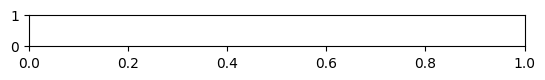

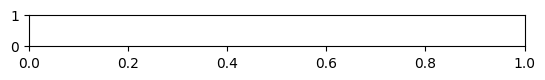

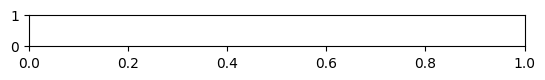

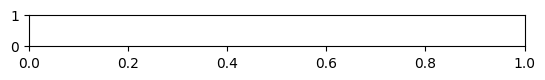

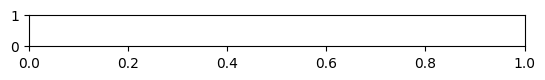

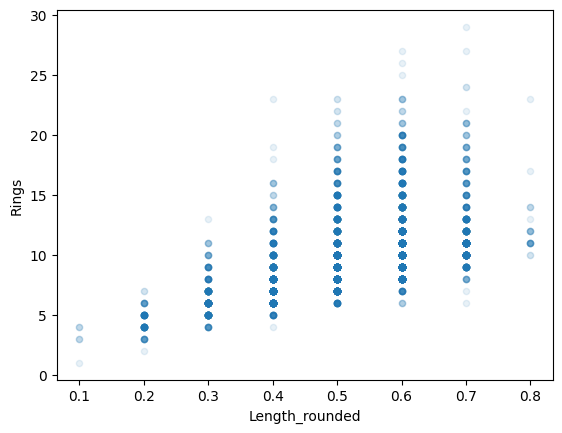

In [ ]:
# num_cols=1
# num_rows=(len(abalone.columns) + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols*3.5, num_rows*3.5))
# TODO
# plt.subplots_adjust(hspace=0.4, wspace=0.4)
for (i, c) in enumerate(abalone.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    abalone.plot.scatter(c, "Rings", alpha=0.1)
    plt.xlabel(c)
    plt.ylabel("Rings")

None

<Figure size 1400x1050 with 0 Axes>

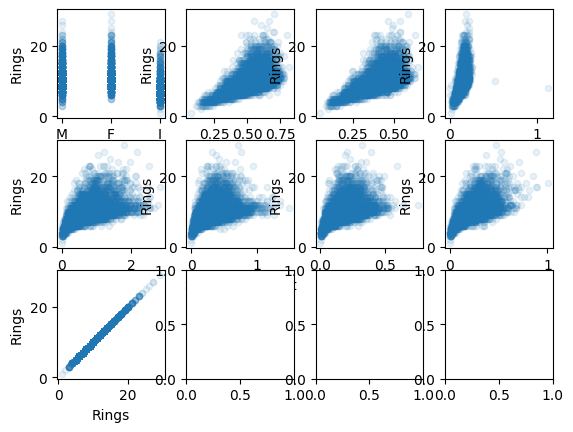

In [ ]:
num_cols=4
num_rows=(len(abalone.columns) + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols*3.5, num_rows*3.5))
(fig, axes) = plt.subplots(nrows=num_rows, ncols=num_cols)

for (i, c) in enumerate(abalone.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    abalone.plot.scatter(c, "Rings", alpha=0.1, ax=axes[i // num_cols][i % num_cols])
    plt.xlabel(c)
    plt.ylabel("Rings")
    plt.xlabel(c)


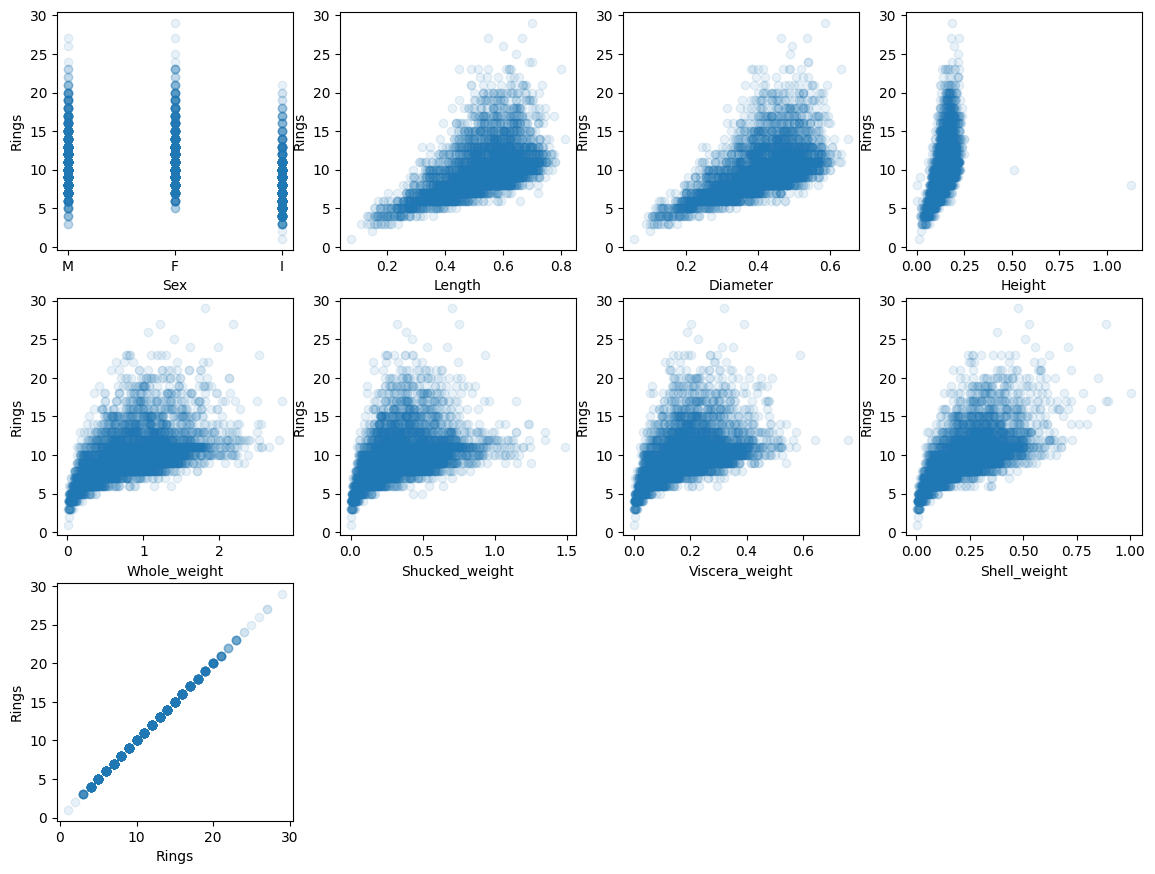

In [ ]:
num_cols=4
num_rows=(len(abalone.columns) + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols*3.5, num_rows*3.5))

for (i, c) in enumerate(abalone.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.scatter(abalone[c], abalone["Rings"], alpha=0.1)
    plt.xlabel(c)
    plt.ylabel("Rings")
    plt.xlabel(c)

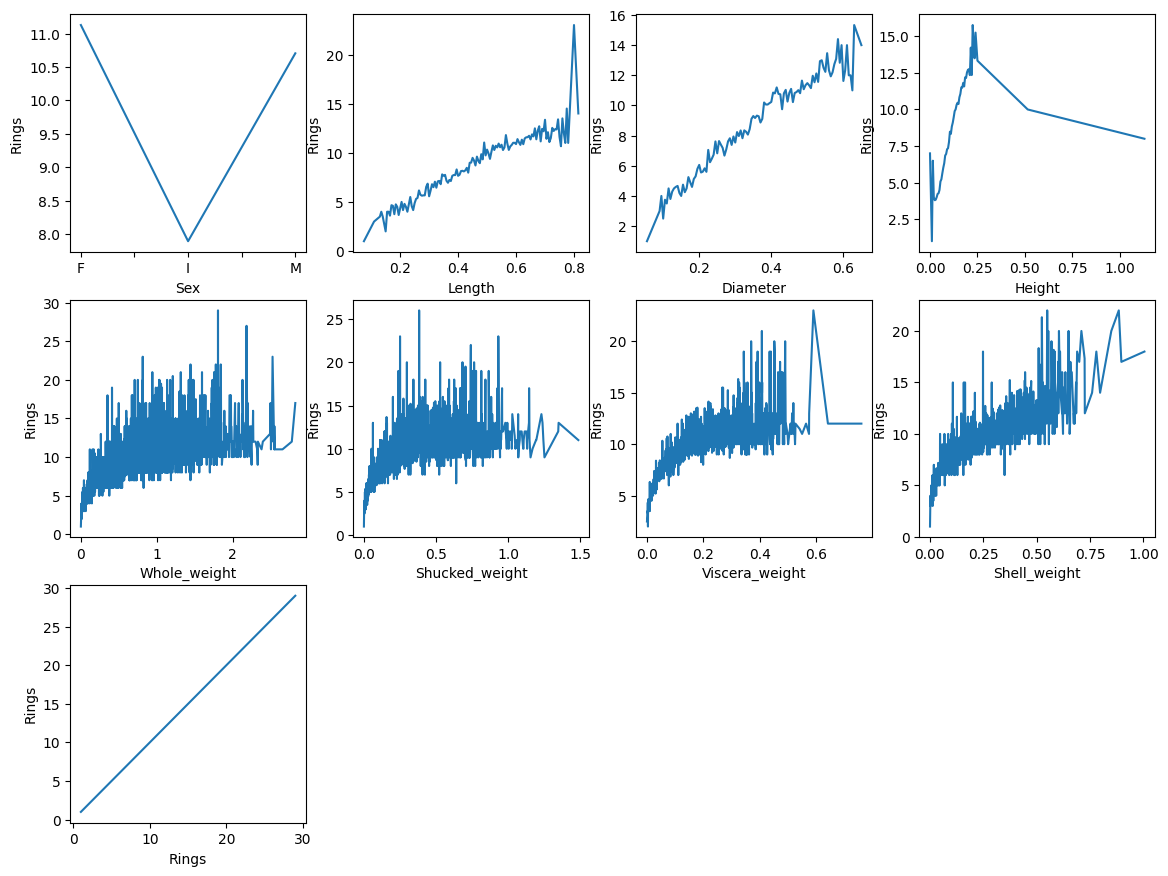

In [ ]:
num_cols=4
num_rows=(len(abalone.columns) + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols*3.5, num_rows*3.5))
for (i, c) in enumerate(abalone.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    # abalone.plot.scatter(c, "Rings", alpha=0.1)
    abalone_c = abalone.groupby(c)["Rings"].mean()
    #plt.scatter(abalone_c.index, abalone_c["Rings"])
    abalone_c.plot(y="Rings")
    plt.xlabel(c)
    plt.ylabel("Rings")
    plt.xlabel(c)

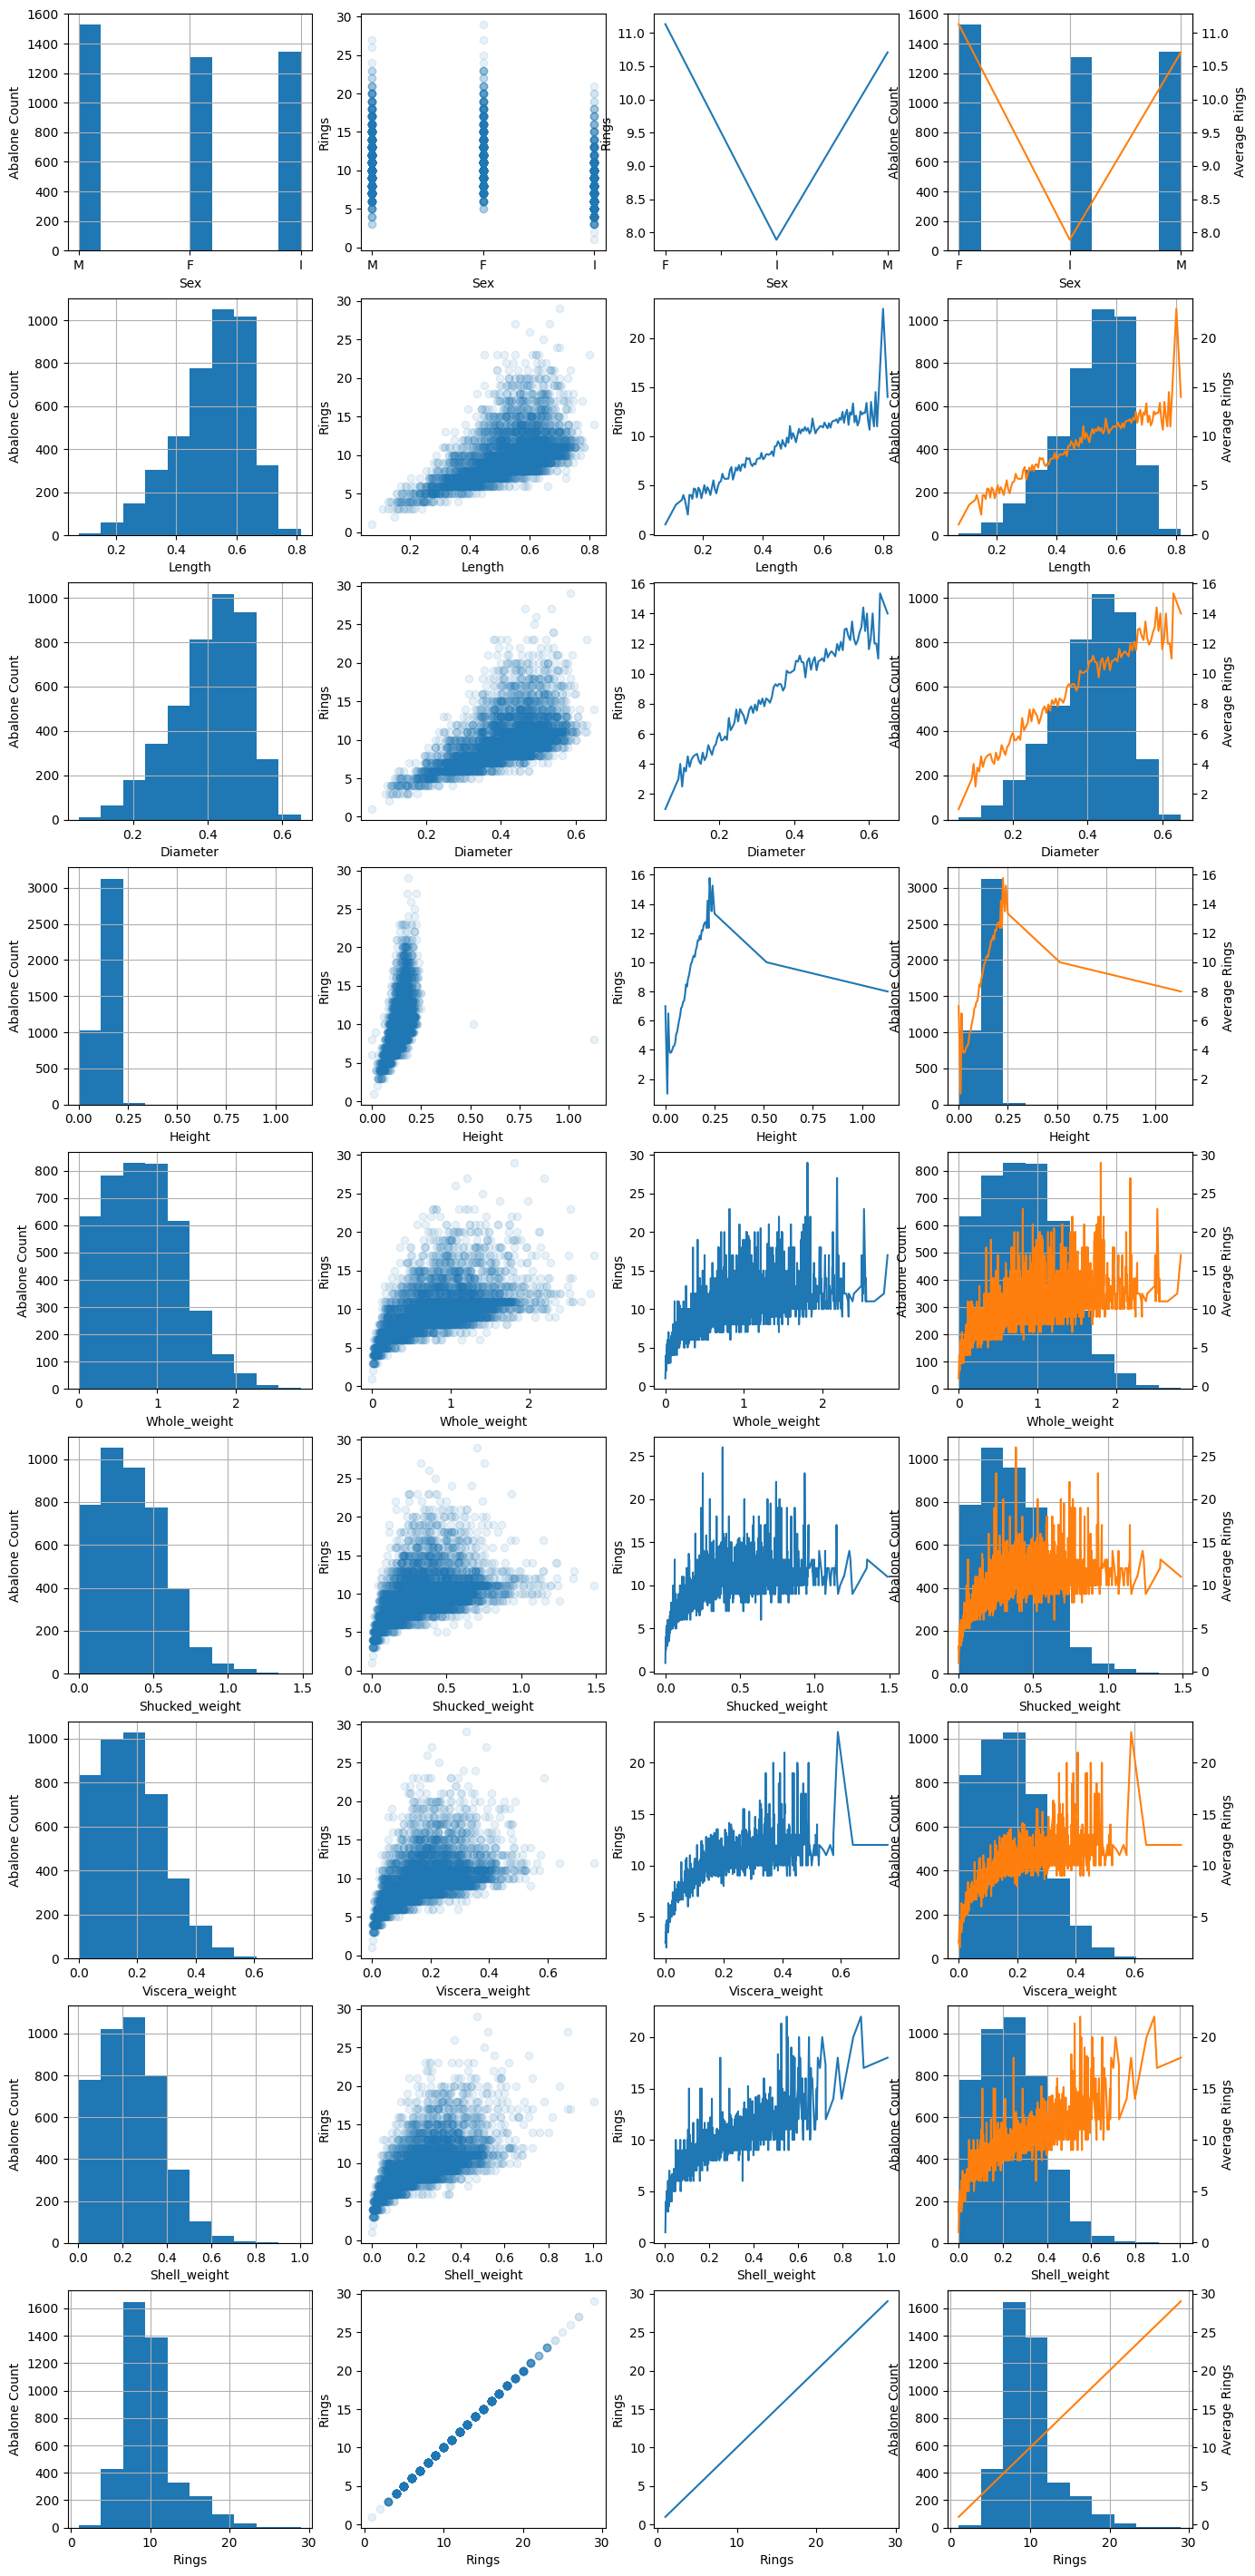

In [ ]:
num_cols = 4
num_rows = len(abalone.columns)

plt.figure(figsize=(4 * num_cols, 4 * num_rows))

for (i, c) in enumerate(abalone.columns):
    plt.subplot(num_rows, num_cols, num_cols * i + 1)
    abalone[c].hist()
    plt.xlabel(c)
    plt.ylabel("Abalone Count")
    # plt.title(f"Abalone Count by {c}")

    plt.subplot(num_rows, num_cols, num_cols * i + 2)
    #abalone.plot.scatter(c, "Rings", alpha=0.2)
    plt.scatter(abalone[c], abalone["Rings"], alpha=0.1)
    plt.xlabel(c)
    plt.ylabel("Rings")

    plt.subplot(num_rows, num_cols, num_cols * i + 3)
    abalone_c = abalone.groupby(c)["Rings"].mean()
    abalone_c.plot(y="Rings")
    plt.ylabel("Rings")

    plt.subplot(num_rows, num_cols, num_cols * i + 4)
    abalone[c].hist(label="Count")
    plt.ylabel("Abalone Count")
    abalone_c.plot(y="Rings", secondary_y=True)
    plt.ylabel("Average Rings")

None

In [ ]:
for c in abalone.columns:
    if len(abalone[c].unique()) <= 10:
        print(abalone.groupby(c)["Rings"].describe())

      count       mean       std  min  25%   50%   75%   max
Sex                                                         
F    1307.0  11.129304  3.104256  5.0  9.0  10.0  12.0  29.0
I    1342.0   7.890462  2.511554  1.0  6.0   8.0   9.0  21.0
M    1528.0  10.705497  3.026349  3.0  9.0  10.0  12.0  27.0


TODO

* handle too many distinct values case
* handle missing data

## Visualizing with One Input Variable

TODO where should this go?

* Usually can repeat visualization for every variable
* X-axis = values of selected variable
* Y-axis and chart type vary with data types...